In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import mpl_toolkits
%matplotlib inline

In [2]:
data = pd.read_csv("kc_house_data.csv")

In [3]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [6]:
corrmat = data.corr()

<AxesSubplot:>

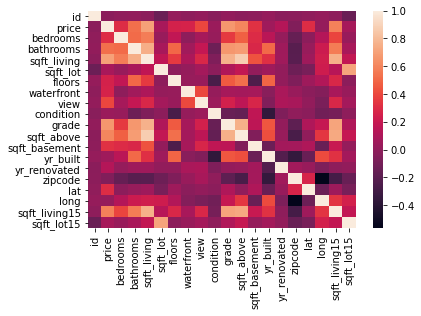

In [7]:
fig = plt.figure(figsize=(6,4))
sns.heatmap(corrmat)

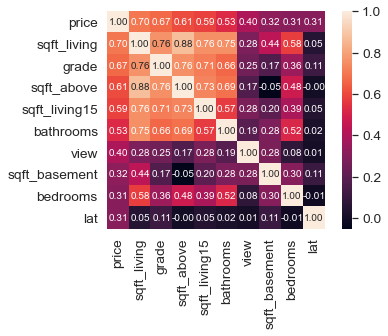

In [8]:
k = 10 
cols = corrmat.nlargest(k, 'price')['price'].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

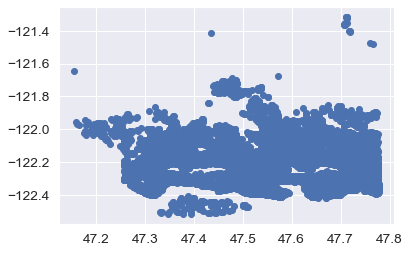

In [9]:
plt.scatter(data["lat"],data["long"])

<AxesSubplot:>

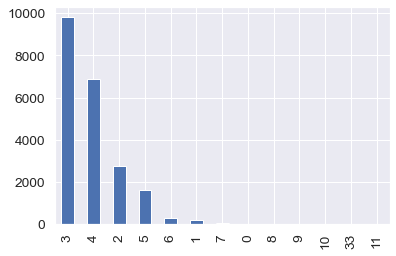

In [10]:
data["bedrooms"].value_counts().plot(kind="bar")

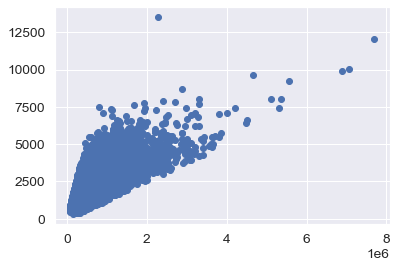

In [11]:
#Bivariate Analysis
plt.scatter(data["price"],data["sqft_living"])

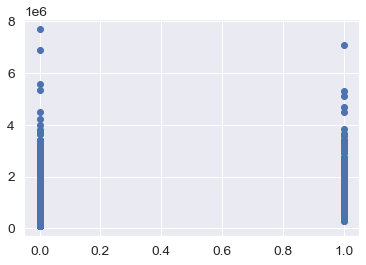

In [12]:
#Waterfront values are 0 or 1 
plt.scatter(data["waterfront"],data["price"])

<AxesSubplot:>

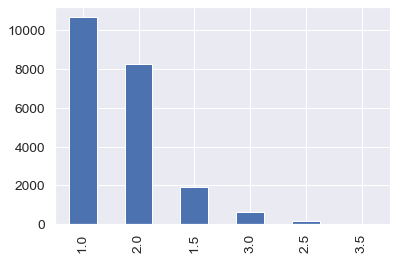

In [13]:
data["floors"].value_counts().plot(kind="bar")

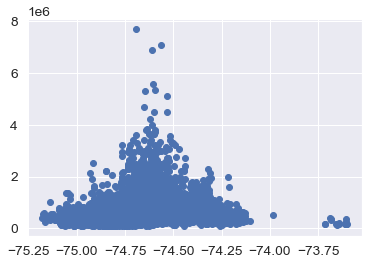

In [14]:
dataloc = data["lat"]+data["long"]
plt.scatter(dataloc, data["price"])

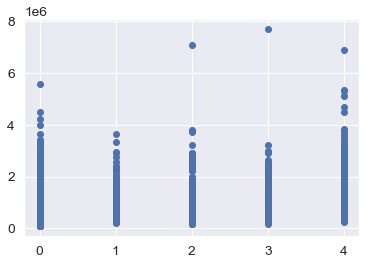

In [15]:
plt.scatter(data["view"],data["price"])

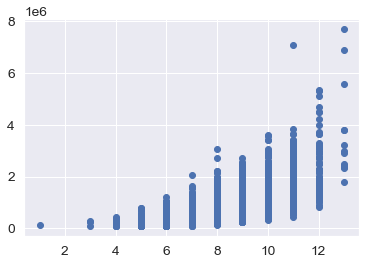

In [16]:
plt.scatter(data["grade"],data["price"])

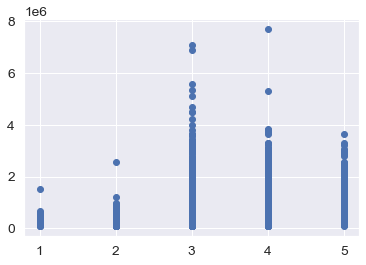

In [17]:
plt.scatter(data["condition"],data["price"])

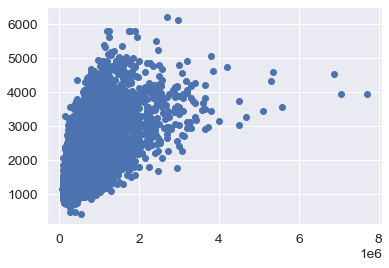

In [18]:
plt.scatter(data["price"],data["sqft_living15"])

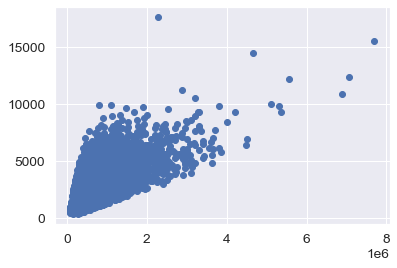

In [19]:
datasq = data["sqft_living"] + data["sqft_basement"]
plt.scatter(data["price"],datasq)

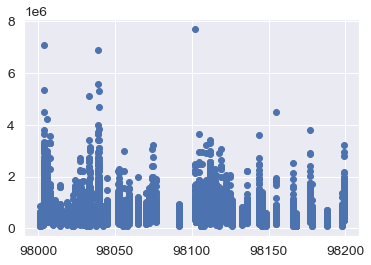

In [20]:
plt.scatter(data["zipcode"],data["price"])

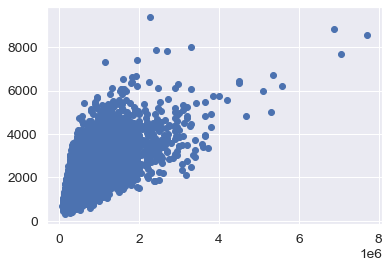

In [21]:
plt.scatter(data["price"],data["sqft_above"])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


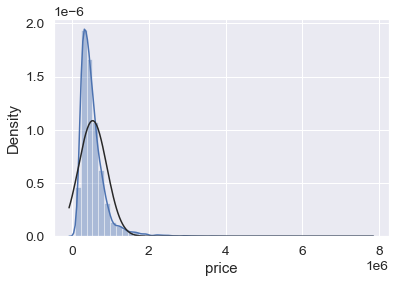

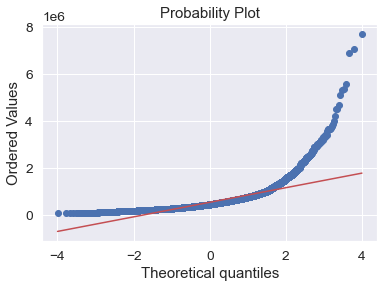

In [22]:
sns.distplot(data["price"], fit=norm)
fig = plt.figure()
res = stats.probplot(data["price"], plot=plt)

In [23]:
#to regularize the values 
data["price"] = np.log(data["price"])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


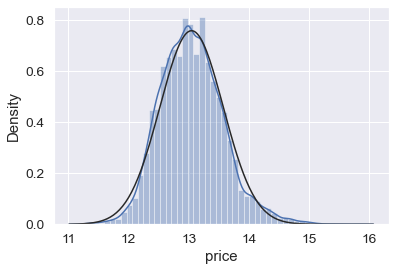

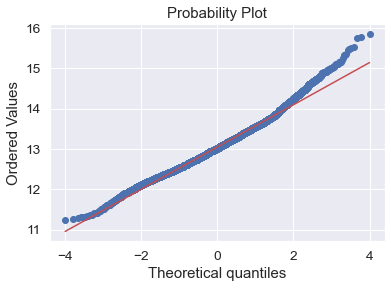

In [24]:
sns.distplot(data["price"], fit=norm)
fig = plt.figure()
res = stats.probplot(data["price"], plot=plt)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


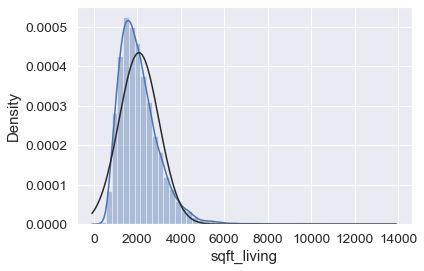

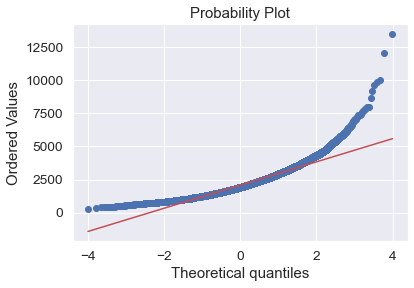

In [25]:
sns.distplot(data["sqft_living"], fit=norm)
fig = plt.figure()
res = stats.probplot(data["sqft_living"], plot=plt)

In [26]:
data["sqft_living"] = np.log(data["sqft_living"])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


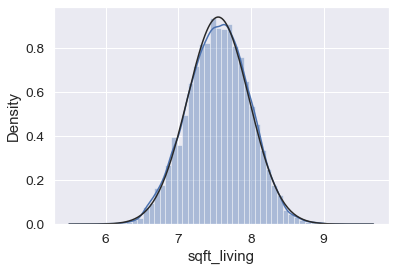

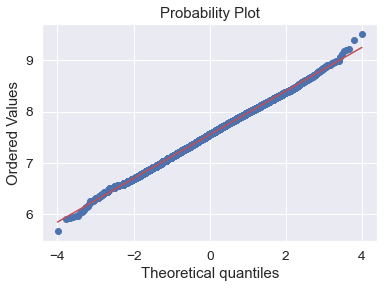

In [27]:
sns.distplot(data["sqft_living"], fit=norm)
fig = plt.figure()
res = stats.probplot(data["sqft_living"], plot=plt)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


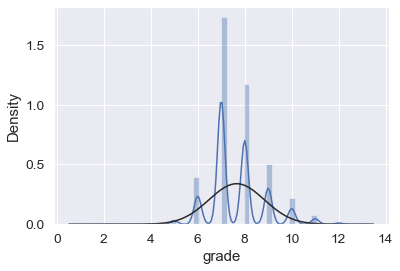

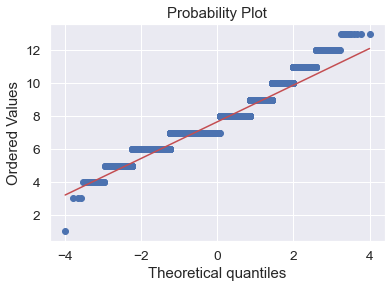

In [28]:
sns.distplot(data["grade"], fit=norm)
fig = plt.figure()
res = stats.probplot(data["grade"], plot=plt)

In [29]:
data["grade"] = np.log(data["grade"])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


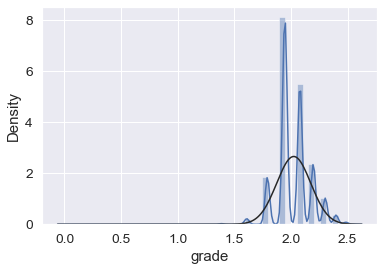

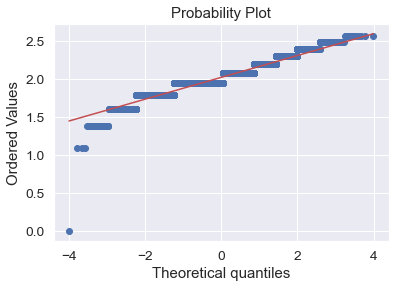

In [30]:
sns.distplot(data["grade"], fit=norm)
fig = plt.figure()
res = stats.probplot(data["grade"], plot=plt)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


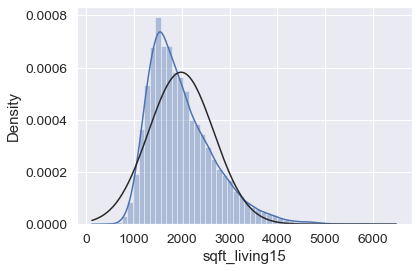

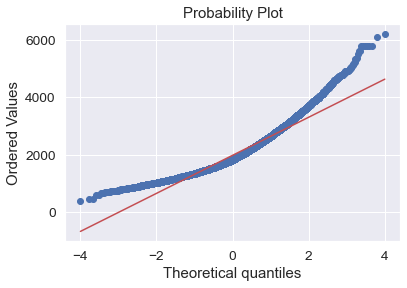

In [31]:
sns.distplot(data["sqft_living15"], fit=norm)
fig = plt.figure()
res = stats.probplot(data["sqft_living15"], plot=plt)

In [32]:
data["sqft_living15"] = np.log(data["sqft_living15"])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


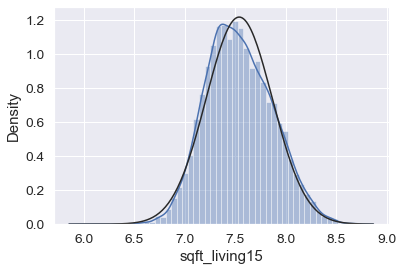

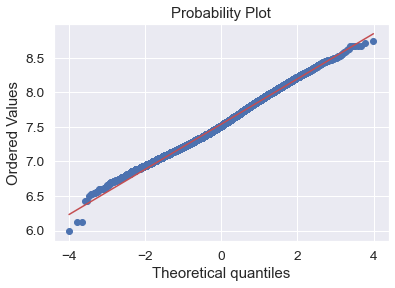

In [33]:
sns.distplot(data["sqft_living15"], fit=norm)
fig = plt.figure()
res = stats.probplot(data["sqft_living15"], plot=plt)

In [34]:
labels = data["price"]
data2 = data.drop(["id","price","date","zipcode"],axis=1)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(data2,labels,test_size=0.3, random_state=44)

In [36]:
reg = LinearRegression()

In [37]:
reg.fit(X_train,y_train)

LinearRegression()

In [38]:
reg.score(X_train,y_train)

0.7703245458111606

In [39]:
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.1, loss = 'ls')

In [40]:
clf.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=5, n_estimators=400)

In [41]:
clf.score(X_test,y_test)

0.9004483980913269

In [42]:
y_pred = reg.predict(X_test)
y_pred

array([12.95648998, 12.73635012, 13.08543645, ..., 12.37803197,
       13.3009006 , 12.45593271])